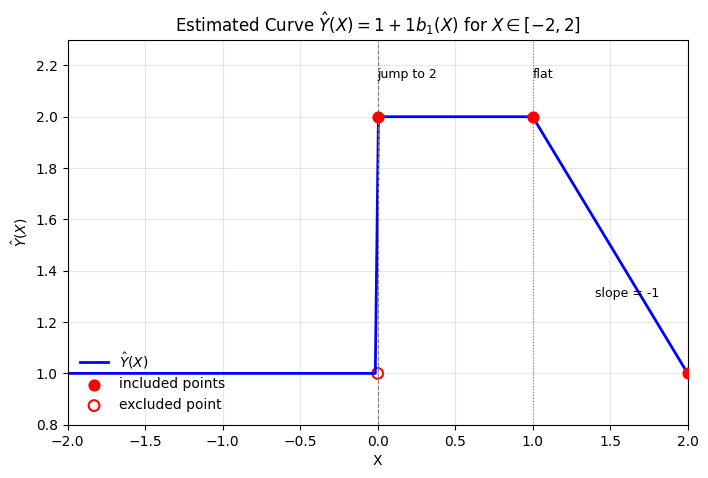

In [1]:
# Chapter 7 Question 4(1)
# Sketch the estimated curve between X = −2 and X = 2

import numpy as np
import matplotlib.pyplot as plt

#Create a range of X values
X = np.linspace(-2, 6, 400)

#Define an indicator function (returns 1 if true, 0 if false)
def I(condition):
    return condition.astype(int)

#Define the basis functions b1(X) and b2(X)
b1 = I((0 <= X) & (X <= 2)) - (X - 1) * I((1 <= X) & (X <= 2))
b2 = (X - 3) * I((3 <= X) & (X <= 4)) + I((4 < X) & (X <= 5))

#Apply the estimated coefficients
beta0, beta1, beta2 = 1, 1, 3
Y_hat = beta0 + beta1 * b1 + beta2 * b2

#Plot the fitted curve 
plt.figure(figsize=(8,5))
plt.plot(X, Y_hat, color='b', linewidth=2, label=r'$\hat{Y}(X)$')

#Draw reference lines for the key breakpoints
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(1, color='gray', linestyle=':', linewidth=0.8)
plt.axvline(2, color='gray', linestyle=':', linewidth=0.8)

#Mark key points (only up to X = 2)
# Filled points = included (function is defined there)
plt.scatter([0,1,2], [2,2,1], color='red', s=60, zorder=5, label='included points')
# Open point = not included (function jumps here)
plt.scatter([0], [1], facecolors='none', edgecolors='red', s=60, linewidths=1.5, label='excluded point')

#Add short text labels for interpretation
plt.text(0, 2.15, 'jump to 2', fontsize=9)
plt.text(1, 2.15, 'flat', fontsize=9)
plt.text(1.4, 1.3, 'slope = -1', fontsize=9)

#Limit the visible range for clarity
plt.xlim(-2, 2)
plt.ylim(0.8, 2.3)

plt.xlabel("X")
plt.ylabel(r"$\hat{Y}(X)$")
plt.title(r"Estimated Curve $\hat{Y}(X)=1+1b_1(X)$ for $X\in[-2,2]$")
plt.legend(frameon=False, loc='lower left')
plt.grid(alpha=0.3)
plt.show()


## Q4(2). Report the intercepts 

The estimated intercept is **1**.  
It represents the baseline value of the fitted model when all basis functions are zero  
(e.g., when (X < 0) or (X > 2)).  
On the plot, this corresponds to the flat segment at **Y = 1** before (X=0).

### Report the slope values

The fitted curve has three slope segments:

- For (X < 0): slope = 0 (flat baseline)  
- For (0 ≤ X ≤ 1): slope = 0 (flat)  
- For (1 ≤ X ≤ 2): slope = –1 (downward)  

Thus, the slope changes from 0 -> –1 -> 0 across the intervals.



## Chapter 8 Q2. Explain why boosting with depth-one trees leads to an additive model

Boosting builds a model step by step.  
Each new tree is added to fix the mistakes made by the previous model:

$$
f^{(m)}(x) = f^{(m-1)}(x) + \lambda h_m(x)
$$

After \(M\) rounds, the final model is

$$
f(x) = \sum_{m=1}^M \lambda h_m(x)
$$

which is additive across all weak learners.

When each weak learner is a **depth-one tree (stump)**,  
it splits on **only one variable**.  
That means each stump depends on a single feature $X_j$:  
$(h_m(x) = h_{m,j} (X_j))$  
Summing over all stumps that act on different variables gives

$$
f(X) = \sum_{j=1}^p f_j(X_j)
$$

So the model becomes additive over variables.

---

### My understanding:
Each stump only looks at one variable, and boosting adds them up one at a time to improve the prediction.  
It’s like saying each variable contributes a small part of the final result,  
and the overall prediction is just the sum of all these small contributions.  
That’s why using decision stumps in boosting naturally creates an additive model.


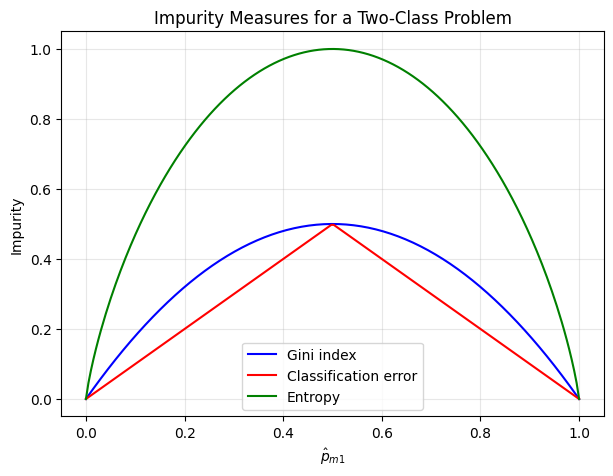

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# range of p_m1
p = np.linspace(0, 1, 200)

# avoid log(0) warnings
p_safe = np.clip(p, 1e-10, 1 - 1e-10)

# impurity measures
gini = 2 * p * (1 - p)
error = 1 - np.maximum(p, 1 - p)
entropy = - (p_safe * np.log2(p_safe) + (1 - p_safe) * np.log2(1 - p_safe))

# plot
plt.figure(figsize=(7,5))
plt.plot(p, gini, label='Gini index', color='blue')
plt.plot(p, error, label='Classification error', color='red')
plt.plot(p, entropy, label='Entropy', color='green')
plt.xlabel(r'$\hat{p}_{m1}$')
plt.ylabel('Impurity')
plt.title('Impurity Measures for a Two-Class Problem')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Chapter8 Q3. Compare the Gini index, classification error, and entropy 

We consider a two-class classification problem with class probabilities  
$(\hat{p}_{m1})$ and $(\hat{p}_{m2} = 1 - \hat{p}_{m1})$.

The three impurity measures are defined as:

$$
\text{Classification Error: } 1 - \max(\hat{p}_{m1}, \hat{p}_{m2})
$$
$$
\text{Gini Index: } 2\hat{p}_{m1}(1 - \hat{p}_{m1})
$$
$$
\text{Entropy: } -[\hat{p}_{m1}\log_2(\hat{p}_{m1}) + (1-\hat{p}_{m1})\log_2(1-\hat{p}_{m1})]
$$

The plot below shows how these measures change as $(\hat{p}_{m1})$ ranges from 0 to 1:

- All three curves are **0** at $(\hat{p}_{m1} = 0)$ or 1, meaning the node is perfectly pure.  
- Each measure reaches its **maximum** at $(\hat{p}_{m1} = 0.5)$, where the classes are evenly mixed.  
- The **classification error** (red) has a sharp “V” shape, showing it changes only when one class overtakes the other.  
- The **Gini index** (blue) is smoother and slightly higher than the error curve.  
- The **entropy** (green) rises and falls most smoothly and reaches the highest value (~1).

These measures are used in decision tree algorithms to evaluate **how pure or mixed** a node is.  
A smaller impurity value means the node is more homogeneous.  
During tree building, the algorithm chooses the split that **reduces impurity the most**  
so these metrics guide the tree in finding the most informative splits.


---
### Why not just use classification error?

Although classification error seems intuitive, it’s not sensitive enough to small changes in class probabilities.
It only checks which class is the majority and ignores how mixed the node really is.

For example, nodes with (0.6, 0.4) and (0.9, 0.1) both look fairly pure,
but their classification errors (0.4 vs. 0.1) change slowly,
making it hard for the algorithm to decide which split is better.

The Gini index and entropy, on the other hand, change smoothly and are more sensitive to differences in purity.
This helps the decision tree **find better splits** and grow more effectively.

In practice:
- **Gini** is used by CART (default in scikit-learn),
- **Entropy** is used by ID3/C4.5,
- **Classification error** is mostly used for evaluating the final model, not for splitting.
